# Example on how to configure a case using mom6-tools

This is a very simple example showing how to read `diag_config.yaml`, create a case instance, compute a climatology and visualize the results.

In [1]:
from mom6_tools.DiagsCase import DiagsCase
import yaml
import xarray as xr
import matplotlib
from mom6_tools import m6toolbox
%matplotlib inline

In [2]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [3]:
# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])

In [4]:
dcase.casename

'g.c2b6.GJRA.TL319_t061.long_JRA_mct.076'

In [5]:
# Load the grid
grd = dcase.grid

MOM6 grid successfully loaded... 



In [6]:
parallel, cluster, client = m6toolbox.request_workers(6)

Requesting 6 workers... 

/proxy/46593/status


In [7]:
RUNDIR = dcase.get_value('RUNDIR')

%time ds = xr.open_mfdataset(RUNDIR+'/'+dcase.casename+'.mom6.sfc_*.nc', \
         parallel=True, data_vars='minimal', chunks={'time': 12},\
         coords='minimal', compat='override')

CPU times: user 4.67 s, sys: 494 ms, total: 5.16 s
Wall time: 1min 37s


In [8]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 21170, xh: 540, xq: 540, yh: 458, yq: 458)
Coordinates:
  * yh          (yh) float64 -79.2 -79.08 -78.95 -78.82 ... 87.64 87.71 87.74
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 -286.7 -286.0 -285.3 -284.7 ... 71.33 72.0 72.67
  * yq          (yq) float64 -79.14 -79.01 -78.89 -78.76 ... 87.68 87.73 87.74
  * xq          (xq) float64 -286.3 -285.7 -285.0 -284.3 ... 71.67 72.33 73.0
  * time        (time) object 0001-01-01 12:00:00 ... 0058-12-31 12:00:00
Data variables:
    SSH         (time, yh, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    tos         (time, yh, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    sos         (time, yh, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    SSU         (time, yh, xq) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    SSV         (time, yq, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    speed       (time, yh, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    mlotst      (time, yh, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    oml         (time, yh, xh) float32 dask.array<chunksize=(12, 458, 540), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(12,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(12,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    time_bnds   (time, nv) timedelta64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Attributes:
    filename:          g.c2b6.GJRA.TL319_t061.long_JRA_mct.076.mom6.sfc_0001.nc
    title:             MOM6 diagnostic fields table for CESM case: g.c2b6.GJR...
    associated_files:  area_t: g.c2b6.GJRA.TL319_t061.long_JRA_mct.076.mom6.s...
    grid_type:         regular
    grid_tile:         N/A

In [9]:
# Plot 5-yearly average sst
sst = ds['tos'].mean('time').load()

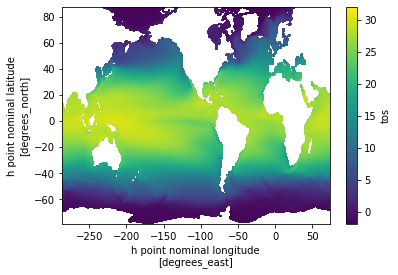

In [10]:
sst.plot(vmin=-2, vmax=32)

In [ ]:
dd